In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

#### t-SNE

(t-distributed stochastic neighbor embedding)

Алгоритм был предложен в 2008 году Лоуренсом ван дер Маатеном и Джеффри Хинтоном.

С помощью t-SNE можно снижать размерность даных, что позволяет визуализировать многомерные данные в 2D или 3D графике.

Если объекты в выборке имеют большое количество признаков, то можно получить представление о них,

преобразовав данные с помощью алгоритма t-SNE.

В частности, можно увидеть возможность разделения объектов на кластеры, определить подходящее их число, а также

получить представление о качестве разбиения на кластеры.

In [2]:
from sklearn.manifold import TSNE

Загрузим данные о недвижимости

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data = boston.data

In [7]:
feature_names = boston.feature_names

In [8]:
X = pd.DataFrame(data, columns=feature_names)

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
price = boston.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.3, random_state=7)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

Масштабирование признаков

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [19]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Применение t-SNE

In [20]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

In [21]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [22]:
X_train_tsne

array([[ 2.32721748e+01, -1.29761276e+01],
       [ 5.66452074e+00, -9.14180088e+00],
       [ 3.23880920e+01, -2.02278404e+01],
       [ 3.36158714e+01, -1.95752373e+01],
       [ 2.49848042e+01, -1.43119011e+01],
       [-1.14220476e+01, -4.93835449e+00],
       [-1.08809719e+01, -7.36843634e+00],
       [-7.67562103e+00,  9.10884666e+00],
       [-1.31940622e+01,  1.58333130e+01],
       [ 2.34953785e+01, -2.30524616e+01],
       [-1.22125463e+01,  1.14928999e+01],
       [ 2.20403671e+01, -1.26745787e+01],
       [-4.87584686e+00,  1.58501625e+00],
       [-1.57361660e+01,  1.52322922e+01],
       [ 3.23476906e+01, -2.13490429e+01],
       [-1.53806705e+01,  1.93265228e+01],
       [-1.27268724e+01,  6.80443478e+00],
       [ 3.20102234e+01, -2.19157391e+01],
       [-1.18157578e+01,  1.56995497e+01],
       [ 2.37995319e+01, -1.70898056e+01],
       [ 3.60807419e+00, -8.96491337e+00],
       [-1.64206486e+01,  2.96712112e+00],
       [-1.40932856e+01,  1.35224714e+01],
       [-1.

In [23]:
X_train_tsne.shape

(354, 2)

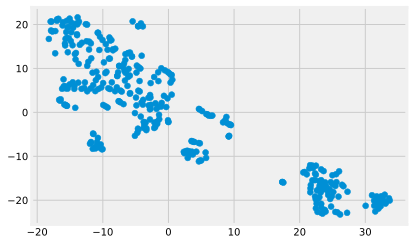

In [24]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

Разобьем данные на 2 кластера

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=2)

In [27]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [28]:
pd.value_counts(labels_train)

0    232
1    122
dtype: int64

In [29]:
labels_test = kmeans.predict(X_test_scaled)

График t-SNE с известными лейблами

Text(25, -7, 'Кластер 1')

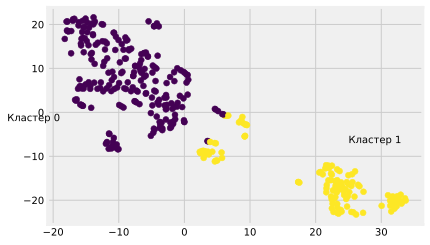

In [30]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-27, -2, 'Кластер 0')
plt.text(25, -7, 'Кластер 1')

Посмотрим на данные, расположенные в разных кластерах

In [31]:
y_train.mean()

22.595762711864406

In [32]:
y_train[labels_train==0].mean()

25.94439655172414

In [33]:
y_train[labels_train==1].mean()

16.227868852459018

Text(0.5, 0, 'Цена')

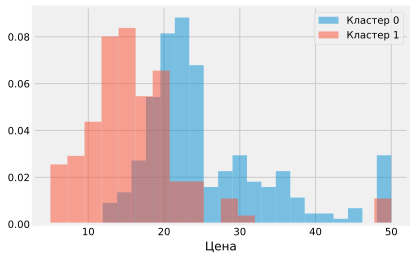

In [34]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

In [35]:
X_train.loc[labels_train==0, 'RM'].mean()

6.448517241379314

In [36]:
X_train.loc[labels_train==1, 'RM'].mean()

5.909286885245898

In [37]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.26798159482758627

In [38]:
X_train.loc[labels_train==1, 'CRIM'].mean()

9.05679418032787

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

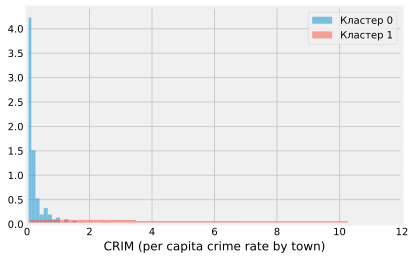

In [39]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('CRIM (per capita crime rate by town)')

Text(0.5, 0, 'NOX\nnitric oxides concentration (parts per 10 million)')

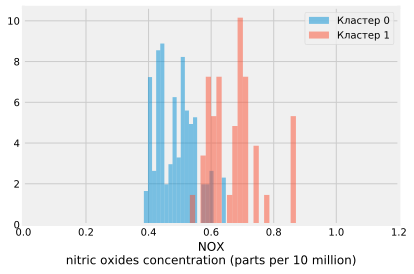

In [40]:
plt.hist(X_train.loc[labels_train==0, 'NOX'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'NOX'], bins = 20, density = True, alpha=0.5)
plt.xlim(0, 1.2)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('NOX\nnitric oxides concentration (parts per 10 million)')

#### Использование информации, полученной с помощью t-SNE в моделях

Базовая модель предсказания цены на недвижимость (до разделения на кластеры)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
y_test_pred = lr.predict(X_test_scaled)

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test, y_test_pred)

0.6508417720329545

Две модели, построеннные на объектах из разных кластеров

In [47]:
# 1я модель - на объектах из Кластера 0
lr.fit(X_train_scaled.loc[labels_train==0, :], 
       y_train[labels_train==0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test==0, :])

r2_score(y_test[labels_test==0], y_test_pred_0)

0.831603433529844

In [48]:
# 2я модель - на объектах из Кластера 1
lr.fit(X_train_scaled.loc[labels_train==1, :], 
       y_train[labels_train==1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test==1, :])

r2_score(y_test[labels_test==1], y_test_pred_1)

0.6458127429551197

In [49]:
# Объединение известных правильных ответов по объектам из двух кластеров
y_test_all = np.hstack([y_test[labels_test==0], 
                        y_test[labels_test==1]])

In [50]:
# Объединение предсказанных ответов по объектам из двух кластеров
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1])

In [51]:
# R2 по всем объектам тестовой выборки
r2_score(y_test_all, y_test_pred_all)

0.8055877528812476